In [35]:
import pandas as pd

In [36]:
pr = pd.read_excel("analyzing_shared_conversation/RQ2/final_rq2_pr.xlsx")
issue = pd.read_excel("analyzing_shared_conversation/RQ2/final_rq2_issue.xlsx")

In [37]:
merge_both_pr_issue_both_pr_issue = pd.concat([pr, issue],ignore_index=True)
merge_both_pr_issue_both_pr_issue

,chat_id,round_id,Category,prompt,answer,type
0,247,0,Reveal the initial task,I am working in an angular component and I am ...,ChatGPTThe way you've implemented the click ev...,pr
1,247,1,Reveal a new task,"What about doing this:\n\n<li (click)=""someMet...","ChatGPTAdding role=""button"" does improve the a...",pr
2,273,0,Reveal the initial task,I want this game to rely on local storage to r...,ChatGPTYou can use the localStorage object to ...,pr
3,273,1,Asking for clarification,Looks cool. No changes to index.html?,ChatGPTThe index.html file doesn't need to cha...,pr
4,273,2,Iterative follow-up,npm test\n\n> banzukesurfing@1.0.0 test\n> jes...,ChatGPTIt seems like you are trying to run you...,pr
...,...,...,...,...,...,...
640,594,0,Reveal the initial task,"Identify the quote: My precious. Yes, my preci...","ChatGPTThe quote ""My precious. Yes, my preciou...",issue
641,594,1,Negative feedback,No! LR is not a series. Gollum said it in Hobb...,ChatGPTI apologize for the confusion. You are ...,issue
642,594,2,Negative feedback,But it’s not a series!,ChatGPTI apologize for any misunderstanding. Y...,issue
643,594,3,Negative feedback,No! It’s NOT a trilogy! It is a single story. ...,ChatGPTI apologize for any confusion. You're a...,issue


In [38]:
#merge_both_pr_issue_both_pr_issue.to_excel('final_rq2_data.xlsx', index=False)

Text(0.5, 1.0, 'Markov Transition Graph')

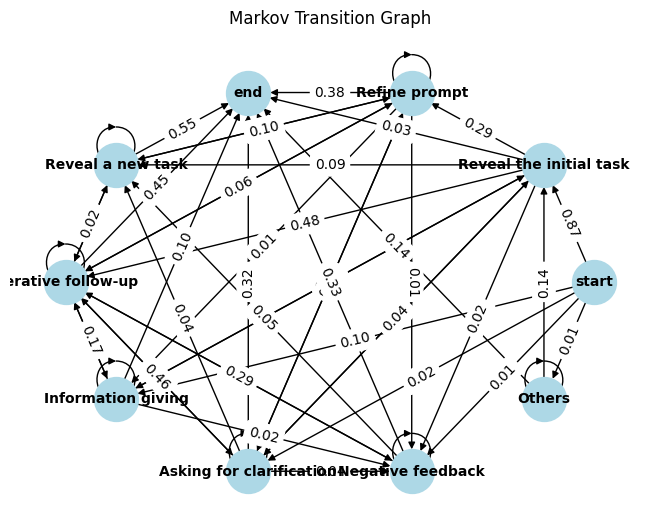

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# Function to calculate transitions
def calculate_transitions(sequences):
    transitions = defaultdict(int)
    total_transitions = defaultdict(int)

    for seq in sequences:
        for i in range(len(seq) - 1):
            transitions[(seq[i], seq[i + 1])] += 1
            total_transitions[seq[i]] += 1

    # Calculate probabilities
    probabilities = {k: v / total_transitions[k[0]] for k, v in transitions.items()}
    return probabilities


# Type is the conversation intent type
merge_both_pr_issue_both_pr_issue['uniq_chat_id'] = merge_both_pr_issue_both_pr_issue['chat_id'].astype(str) +"_" + merge_both_pr_issue_both_pr_issue['type']

merge_both_pr_issue_both_pr_issue.head()
grouped = merge_both_pr_issue_both_pr_issue.groupby('uniq_chat_id')['Category'].apply(list).reset_index(name='type_list')
# Add start and end tokens
string_to_add_begin = 'start'
string_to_add_end = 'end'

# Add the string to each list in 'type_list'
grouped['type_list'] = grouped['type_list'].apply(lambda x: [string_to_add_begin] + x +[string_to_add_end])

# Calculate transition probabilities
probabilities = calculate_transitions(grouped['type_list'].tolist())

# Create a directed graph
G = nx.DiGraph()

# Add edges with probabilities
for (src, dst), prob in probabilities.items():
    G.add_edge(src, dst, weight=prob, label=f"{prob:.2f}")

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)})

plt.title("Markov Transition Graph")